In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt


In [87]:
from google.colab import drive
import h5py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
raw_health_df = pd.read_csv("/content/drive/MyDrive/health_project/heart_attack_final_table.csv")
raw_health_df.nunique()


id                            5478
asthma_age                      21
ever_overweight                  2
heart_failure_age               32
age_chronic_heart_disease       38
angina_pectoris_age             30
heart_attack_age                53
stroke_age                      24
thyroid_age                     16
liver_age                       11
fatty_liver                      2
liver_fibrosis                   2
liver_cirrhosis                  2
liver_viral_hepatitis            2
liver_autoimmune_hepatitis       2
other_liver_disease              2
gallbladder_pr_age              20
relative_asthma                  2
relative_diabetes                2
relative_heart_attack            2
heart_attack                     2
asthma_yrs                      27
heart_failure_yrs                9
chronic_heart_disease_yrs        8
angina_pectoris_yrs             12
stroke_yrs                      10
thyroid_yrs                     12
liver_disease_yrs               10
gallbladder_pr_yrs  

In [127]:
health_df['heart_attack'].value_counts()

0    5283
1     195
Name: heart_attack, dtype: int64

In [120]:
health_df = raw_health_df[['heart_attack','heart_attack_age', 'max_age', 'age_chronic_heart_disease', 'angina_pectoris_age', 'heart_failure_age', 'asthma_age', 'stroke_age']].copy()



health_df.head()

,heart_attack,heart_attack_age,max_age,age_chronic_heart_disease,angina_pectoris_age,heart_failure_age,asthma_age,stroke_age
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
result0 = (health_df['heart_failure_age'] != 0).sum()

result0

51

In [126]:
health_df[health_df['heart_attack'] == 0]

,heart_attack,heart_attack_age,max_age,age_chronic_heart_disease,angina_pectoris_age,heart_failure_age,asthma_age,stroke_age,both_nonzero
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...
5472,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5473,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5474,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5475,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [122]:
health_df['both_nonzero'] = (health_df['heart_failure_age'] != 0) & (health_df['heart_attack'] != 0)
result = health_df[health_df['both_nonzero']]
len(result)

51

In [111]:
test = health_df[(health_df['heart_failure_age'] != 0) & (health_df['heart_attack'] != 0)]

len(test)

51

In [110]:
health_df.nunique(axis=0)

heart_attack                  2
heart_attack_age             53
max_age                      57
age_chronic_heart_disease    38
angina_pectoris_age           2
heart_failure_age            32
asthma_age                    2
stroke_age                   24
both_nonzero                  2
dtype: int64

In [52]:
#STOP running cells here and skip to model
#------------------------------------------------------------------------Original--#

In [56]:
# # Run to focus on certain counts , current is a placeholder
# age_count = health_df['heart_attack_age'].value_counts()
# print(age_count.to_string())

In [30]:
# # Choose a cutoff value and create a list of application types to be replaced
# # use the variable name `application_types_to_replace`
# ages_to_replace = list(age_count[age_count > 50.0].index)

#  # Replace in dataframe
# for col in ages_to_replace:
#     health_df['heart_attack_age'] = health_df['heart_attack_age'].replace(col,"Other")

# # # Check to make sure binning was successful
# health_df['heart_attack_age'].value_counts()

Other    5478
Name: heart_attack_age, dtype: int64

In [85]:
# Get dummies
number_health_df = pd.get_dummies(health_df)
# number_health_df = health_df
number_health_df.head(20)

number_health_df.to_csv("/content/drive/MyDrive/sevenAge.csv")


In [74]:
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["heart_attack"],1).values
y = number_health_df["heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-74-b4bc234d8be6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = number_health_df.drop(["heart_attack"],1).values


In [75]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [76]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(80, activation="relu", input_dim=7))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                640       
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
129/129 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.9888
Epoch 2/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 3/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/25
129/129 [==============================] - 0s 2ms/step - loss: 7.5316e-04 - accuracy: 1.0000
Epoch 6/25
129/129 [==============================] - 0s 2ms/step - loss: 4.9002e-04 - accuracy: 1.0000
Epoch 7/25
129/129 [==============================] - 0s 2ms/step - loss: 3.3926e-04 - accuracy: 1.0000
Epoch 8/25
129/129 [==============================] - 0s 2ms/step - loss: 2.4885e-04 - accuracy: 1.0000
Epoch 9/25
129/129 [==============================] - 0s 2ms/step - loss: 1.8982e-04 - accuracy: 1.0000
Epoch 10/25
129/129 [==============================] - 0s 2ms/step - loss: 1.471

In [79]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: 1.0413e-05 - accuracy: 1.0000 - 312ms/epoch - 7ms/step
Loss: 1.041281757352408e-05, Accuracy: 1.0


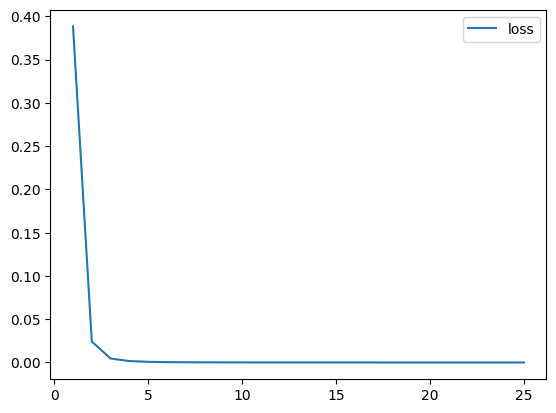

In [49]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

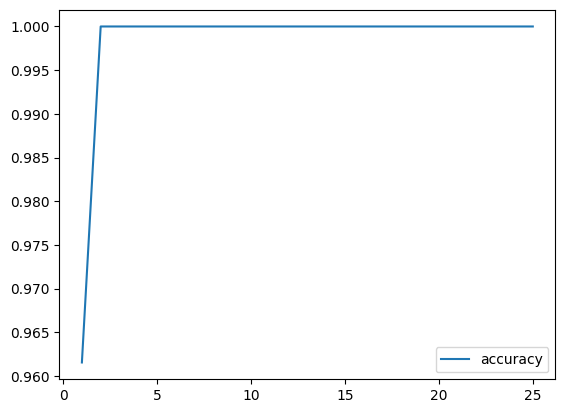

In [50]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# file_export = "/content/drive2/MyDrive/xyz.h5"
# nn.save(file_export)

In [6]:
#------------------------------------------------------------------------Optimization1--#

In [36]:
# Get dummies
number_health_df = pd.get_dummies(health_df)

# number_health_df.head()
number_health_df

,relative_heart_attack,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,0,105.0,0,0,0,4.0,0,2.0,0,0
2,0,0,0,172.0,0,0,0,4.0,0,6.0,0,0
3,0,0,0,214.0,0,0,0,6.0,0,2.0,0,0
4,0,0,0,161.0,0,0,0,9.0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5497,0,0,0,203.0,0,0,0,3.0,0,1.0,0,0
5498,0,0,0,200.0,0,0,0,3.0,0,2.0,0,0
5499,0,0,0,234.0,0,0,0,9.0,0,2.0,0,0
5500,0,0,0,155.0,0,0,0,5.0,0,5.0,0,0


In [39]:
# Split our preprocessed data into our features and target arrays
X = number_health_df[["chronic_heart_disease", "heart_failure"]].values
# X = number_health_df[["thyroid","liver_disease"]].values
y = number_health_df["relative_heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [40]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(7, activation="relu", input_dim=2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(14, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 21        
                                                                 
 dense_16 (Dense)            (None, 14)                112       
                                                                 
 dense_17 (Dense)            (None, 1)                 15        
                                                                 
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
129/129 [==============================] - 1s 6ms/step - loss: 0.3790 - accuracy: 0.8725
Epoch 2/25
129/129 [==============================] - 1s 7ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 3/25
129/129 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 4/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8725
Epoch 5/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 6/25
129/129 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8725
Epoch 7/25
129/129 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 8/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8725
Epoch 9/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8725
Epoch 10/25
129/129 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8725

In [45]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: 0.3517 - accuracy: 0.8859 - 254ms/epoch - 6ms/step
Loss: 0.35173311829566956, Accuracy: 0.885901153087616


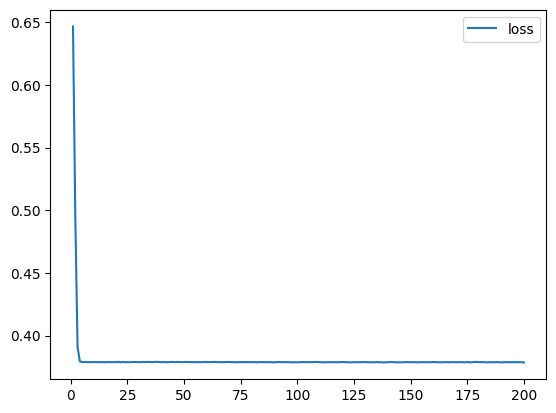

In [46]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

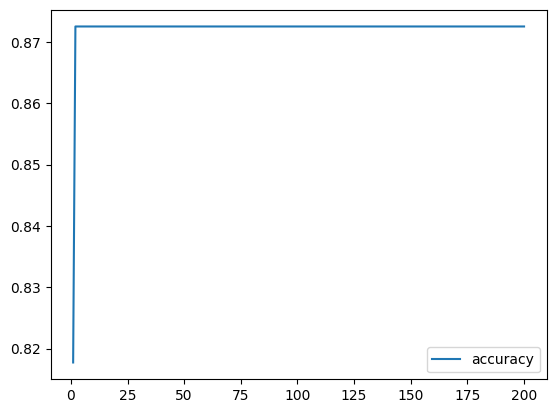

In [47]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
#------------------------------------------------------------------------Optimization2: Tune for hyperparameters--#

In [53]:
# Get dummies if not binary 
number_health_df = pd.get_dummies(health_df)

number_health_df.head()

,relative_heart_attack,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,0,105.0,0,0,0,4.0,0,2.0,0,0
2,0,0,0,172.0,0,0,0,4.0,0,6.0,0,0
3,0,0,0,214.0,0,0,0,6.0,0,2.0,0,0
4,0,0,0,161.0,0,0,0,9.0,0,1.0,0,0


In [55]:
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["relative_heart_attack"],1).values
y = number_health_df["relative_heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-55-bebf46bc315f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = number_health_df.drop(["relative_heart_attack"],1).values


In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [57]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

ModuleNotFoundError: ignored